In [ ]:
from math import log2
from collections import defaultdict
import matplotlib.pyplot as plt

## Setting up helper functions

In [2]:
def calc_probs_chars(path, order):
    joints = defaultdict(int)
    length = 0
    with open(path, 'r') as text:
        for idx, line in enumerate(text):
            length += len(line)
            if idx == 0:
                line = '_' * order + line # add padding for normalization
                
            for i in range(order, len(line)):
                joints[line[i-order:i+1]] += 1

    for key in joints:
        joints[key] /= length

    return joints

def calc_cond_chars(joints, order):
    marginals = defaultdict(int)
    conditionals = defaultdict(dict)

    for joint, prob in joints.items():
        prefix = joint[:-1]
        marginals[prefix] += prob

    for joint, prob in joints.items():
        prefix = joint[:-1]
        conditionals[prefix][joint[-1]] = prob / marginals[prefix]

    return conditionals

def cond_entr_chars(path, order):
    joints = calc_probs_chars(path, order)
    conditionals = calc_cond_chars(joints, order)
    entropy = 0

    for joint, prob in joints.items():
        prefix = joint[:-1]
        char = joint[-1]
        entropy -= prob * log2(conditionals[prefix][char])

    return entropy

In [3]:
def calc_probs_words(path, order):
    joints = defaultdict(int)
    length = 0
    with open(path, 'r') as text:
        for idx, line in enumerate(text):
            words = list(line.split())
            length += len(words)
            if idx == 0:
                words = ['_'] * order + words # add padding for normalization
                
            for i in range(order, len(words)):
                joints[tuple(words[i-order:i+1])] += 1

    for key in joints:
        joints[key] /= length

    return joints

def calc_cond_words(joints, order):
    marginals = defaultdict(int)
    conditionals = defaultdict(dict)

    for joint, prob in joints.items():
        prefix = joint[:-1]
        marginals[prefix] += prob

    for joint, prob in joints.items():
        prefix = joint[:-1]
        conditionals[prefix][joint[-1]] = prob / marginals[prefix]

    return conditionals

def cond_entr_words(path, order):
    joints = calc_probs_words(path, order)
    conditionals = calc_cond_words(joints, order)
    entropy = 0

    for joint, prob in joints.items():
        prefix = joint[:-1]
        char = joint[-1]
        entropy -= prob * log2(conditionals[prefix][char])

    return entropy

In [4]:
def get_cond_entr(text_path):
    chars = []
    words = []
    print("Conditional entropy:")
    for i in range(6):
        c = cond_entr_chars(text_path, i)
        chars.append(c)
        w = cond_entr_words(text_path, i)
        words.append(w)
        print(f"Order: {i} | Characters: {c:.4f} | Words: {w:.4f}")

    return chars, words

In [5]:
def plot(chars, words):
    fig = plt.figure(figsize=(9, 4))
    
    ax_chars = fig.add_subplot(1, 2, 1)
    ax_chars.plot(chars, marker="o")
    ax_chars.set_xlabel("Order")
    ax_chars.set_ylabel("Conditional Entropy")
    ax_chars.set_title("Characters")
    
    ax_words = fig.add_subplot(1, 2, 2)
    ax_words.plot(words, marker="o")
    ax_words.set_xlabel("Order")
    ax_words.set_ylabel("Conditional Entropy")
    ax_words.set_title("Words")

In the following sections I am going to calculate and plot **Conditional Entropy** of characters and words of different languages up to **5th order**, 0th order conditional entropy is a standard entropy.

## 1. English

In [6]:
text_path = "lab3/norm_wiki_en.txt"

In [7]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.2882 | Words: 11.5440
Order: 1 | Characters: 3.5166 | Words: 6.3892
Order: 2 | Characters: 3.0183 | Words: 2.1765
Order: 3 | Characters: 2.4816 | Words: 0.4847
Order: 4 | Characters: 2.0212 | Words: 0.1097
Order: 5 | Characters: 1.6724 | Words: 0.0308


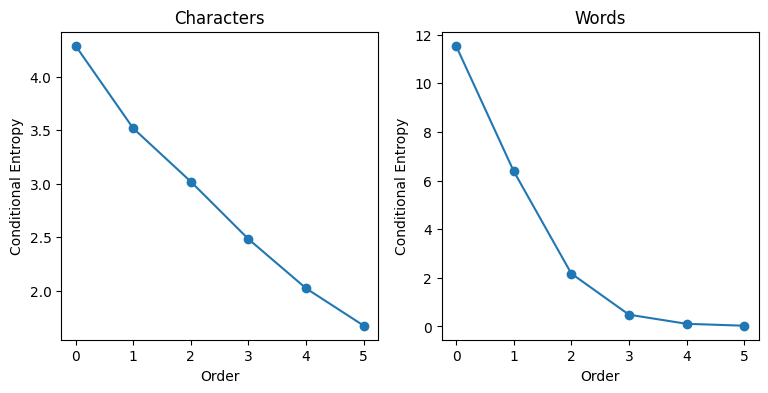

In [8]:
plot(chars, words)

## 2. Latin

In [9]:
text_path = "lab3/norm_wiki_la.txt"

In [10]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.2282 | Words: 11.9692
Order: 1 | Characters: 3.4501 | Words: 4.4000
Order: 2 | Characters: 2.8235 | Words: 1.1669
Order: 3 | Characters: 2.1520 | Words: 0.3880
Order: 4 | Characters: 1.6428 | Words: 0.2065
Order: 5 | Characters: 1.3127 | Words: 0.1651


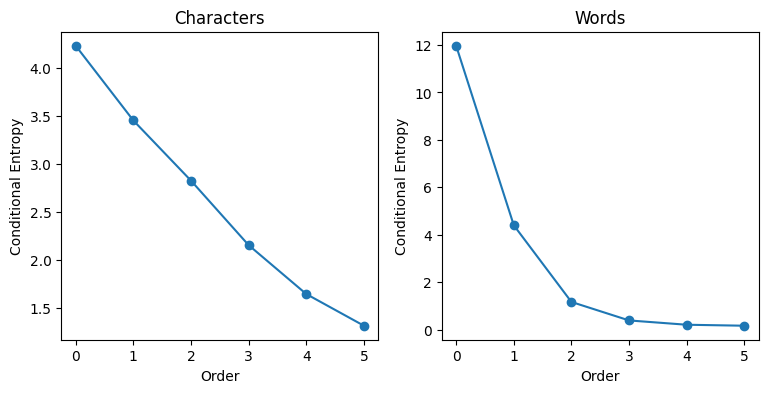

In [11]:
plot(chars, words)

## 3. Esperanto

In [12]:
text_path = "lab3/norm_wiki_eo.txt"

In [13]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.1768 | Words: 11.5605
Order: 1 | Characters: 3.3400 | Words: 6.5577
Order: 2 | Characters: 2.8718 | Words: 2.4847
Order: 3 | Characters: 2.3926 | Words: 0.6336
Order: 4 | Characters: 1.9915 | Words: 0.1617
Order: 5 | Characters: 1.7090 | Words: 0.0469


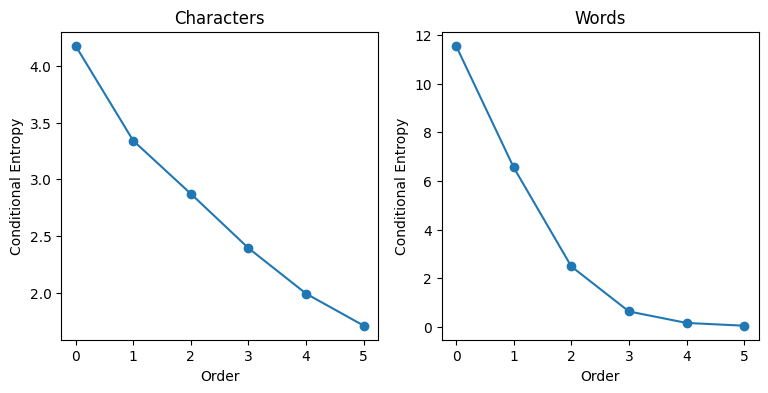

In [14]:
plot(chars, words)

## 4. Estonian

In [15]:
text_path = "lab3/norm_wiki_et.txt"

In [16]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.1698 | Words: 13.7462
Order: 1 | Characters: 3.5070 | Words: 5.4242
Order: 2 | Characters: 3.1344 | Words: 0.9047
Order: 3 | Characters: 2.6109 | Words: 0.1162
Order: 4 | Characters: 2.1114 | Words: 0.0236
Order: 5 | Characters: 1.7297 | Words: 0.0075


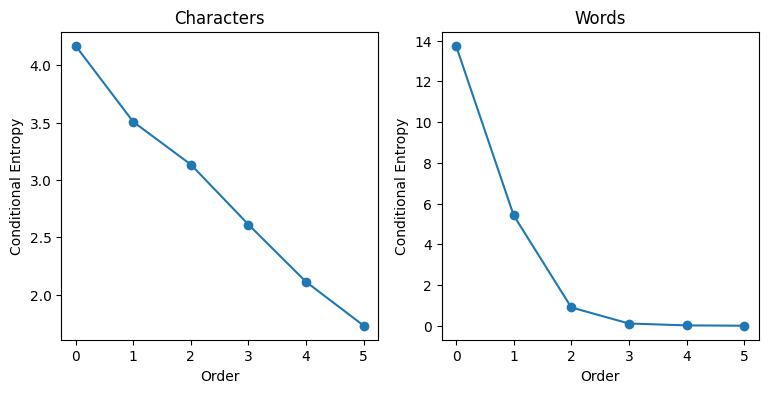

In [17]:
plot(chars, words)

## 5. Somali

In [18]:
text_path = "lab3/norm_wiki_so.txt"

In [19]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.0401 | Words: 11.7311
Order: 1 | Characters: 3.2996 | Words: 5.3987
Order: 2 | Characters: 2.8444 | Words: 1.6086
Order: 3 | Characters: 2.3743 | Words: 0.4096
Order: 4 | Characters: 1.9450 | Words: 0.1166
Order: 5 | Characters: 1.5863 | Words: 0.0395


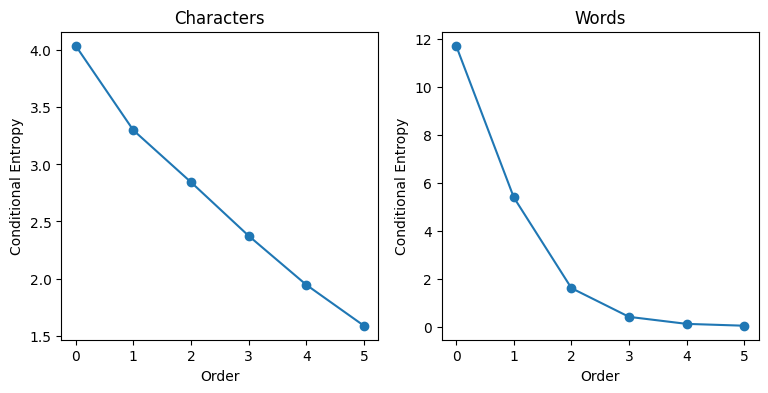

In [20]:
plot(chars, words)

## 6. Haitian

In [21]:
text_path = "lab3/norm_wiki_ht.txt"

In [22]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.1464 | Words: 8.1669
Order: 1 | Characters: 3.1139 | Words: 3.1931
Order: 2 | Characters: 2.2735 | Words: 1.3113
Order: 3 | Characters: 1.4922 | Words: 0.8122
Order: 4 | Characters: 1.0521 | Words: 0.6206
Order: 5 | Characters: 0.7609 | Words: 0.5454


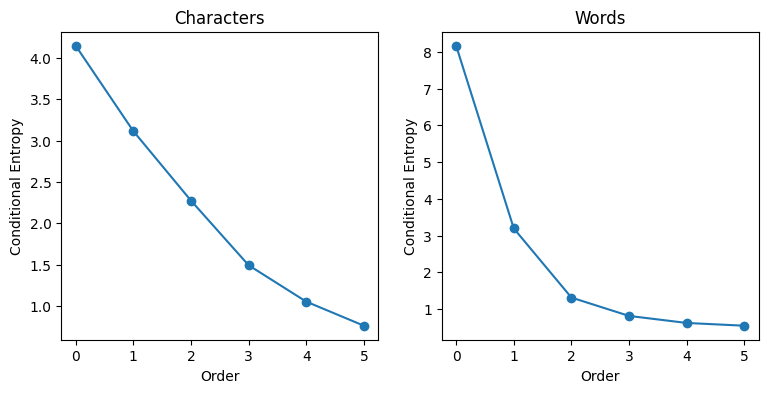

In [23]:
plot(chars, words)

## 7. Navaho

In [24]:
text_path = "lab3/norm_wiki_nv.txt"

In [25]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 3.8749 | Words: 9.1540
Order: 1 | Characters: 2.9473 | Words: 3.8639
Order: 2 | Characters: 2.3676 | Words: 1.7188
Order: 3 | Characters: 1.7953 | Words: 0.8992
Order: 4 | Characters: 1.3416 | Words: 0.5386
Order: 5 | Characters: 1.0198 | Words: 0.3138


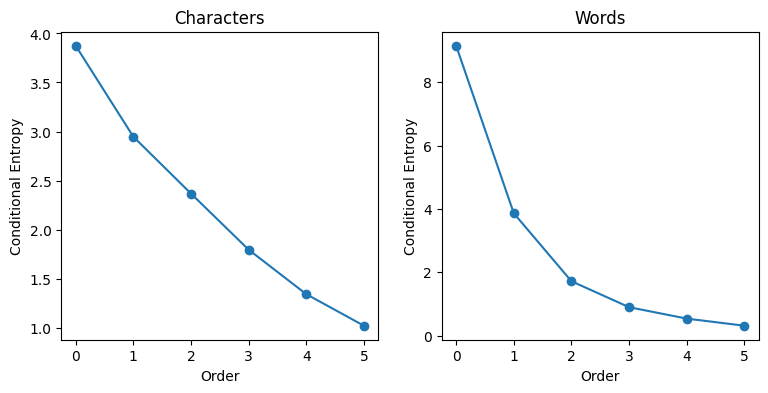

In [26]:
plot(chars, words)

## Observations

For each language, conditional entropy is decreasing with higher order and its graphs follow the same pattern for both characters and words:
- for **words** the plot has a shape of exponential decay
- for **characters** it decreases almost linearly with a slight deviation toward exponential decay

## Evaluation

Now I am going to evaluate **6 samples** and decide whether they contain **natural language** or not. If a sample constains natural language, its plots should look just like in previous examples.

### Sample 1

In [27]:
text_path = "lab3/sample0.txt"

In [28]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.2730 | Words: 7.7487
Order: 1 | Characters: 2.9159 | Words: 7.4864
Order: 2 | Characters: 2.0004 | Words: 4.4067
Order: 3 | Characters: 1.5393 | Words: 0.5950
Order: 4 | Characters: 1.4386 | Words: 0.0121
Order: 5 | Characters: 1.3920 | Words: 0.0001


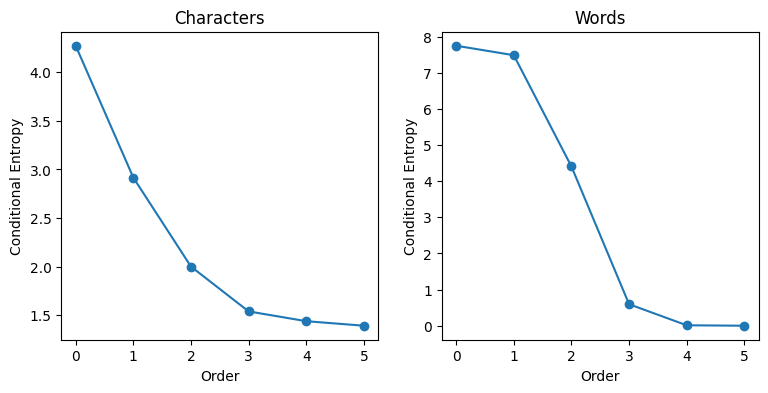

In [29]:
plot(chars, words)

Judgement: **Not** a natural language

Justification:
- the plot for characters is far from being linear
- for words the entropy is almost the same for 0th order and 1st order

The second point tells us that knowing 1 word doesn't tell us anything about the next one, and from the plot we can see that then the conditional entropy drops, so 2 words give us an information about the 3rd one. That's not how natural languages work.

### Sample 2

In [30]:
text_path = "lab3/sample1.txt"

In [31]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.1270 | Words: 11.5007
Order: 1 | Characters: 3.2391 | Words: 5.3722
Order: 2 | Characters: 2.8613 | Words: 1.5747
Order: 3 | Characters: 2.3267 | Words: 0.5075
Order: 4 | Characters: 1.8135 | Words: 0.2935
Order: 5 | Characters: 1.4311 | Words: 0.1506


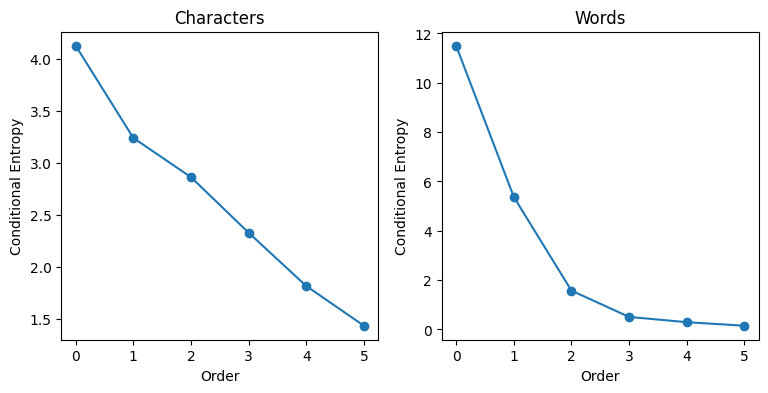

In [32]:
plot(chars, words)

Judgement: natural language

Justification: both plots follow the patterns observed in different human languages

### Sample 3

In [33]:
text_path = "lab3/sample2.txt"

In [34]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 3.9933 | Words: 8.0239
Order: 1 | Characters: 3.0504 | Words: 7.3486
Order: 2 | Characters: 2.4677 | Words: 3.7819
Order: 3 | Characters: 1.9398 | Words: 0.8595
Order: 4 | Characters: 1.7020 | Words: 0.0820
Order: 5 | Characters: 1.6144 | Words: 0.0030


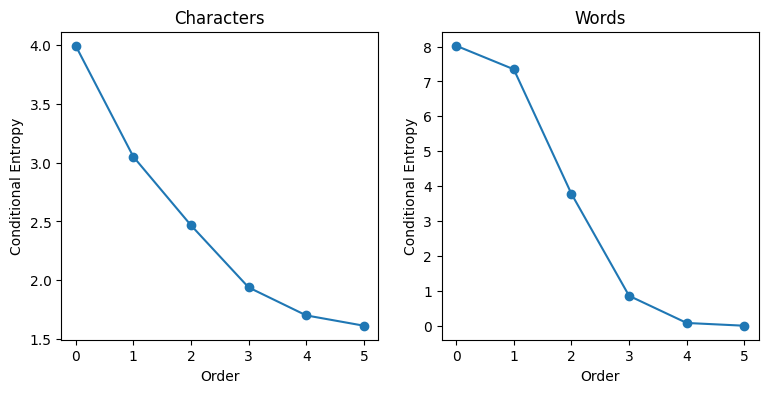

In [35]:
plot(chars, words)

Judgement: **Not** a natural language

Justification:
- the plot for characters is far from being linear
- for words the entropy drops only a little bit from 0th order to 1st order

The second point tells us that knowing 1 word doesn't tell us too much about the next one, and from the plot we can see that then the conditional entropy drops, so 2 words give us an information about the 3rd one. That's not how natural languages work, and although it doesn't look as bad as in sample 1, all in all it is far from the pattern manifested by human languages examples.

### Sample 4

In [36]:
text_path = "lab3/sample3.txt"

In [37]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 3.9303 | Words: 9.0611
Order: 1 | Characters: 3.1845 | Words: 5.9502
Order: 2 | Characters: 2.6279 | Words: 2.6308
Order: 3 | Characters: 2.0240 | Words: 1.2641
Order: 4 | Characters: 1.5342 | Words: 0.4143
Order: 5 | Characters: 1.2504 | Words: 0.2001


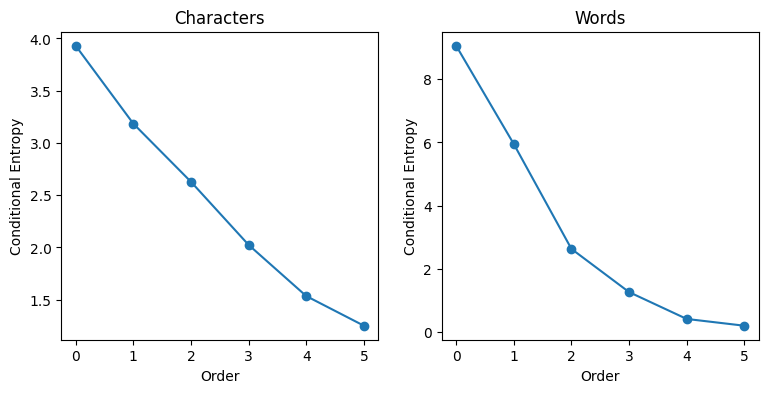

In [38]:
plot(chars, words)

Judgement: natural language

Justification: both plots follow the patterns observed in different human languages

### Sample 5

In [39]:
text_path = "lab3/sample4.txt"

In [40]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.2538 | Words: 17.1297
Order: 1 | Characters: 4.2291 | Words: 3.4443
Order: 2 | Characters: 4.2268 | Words: 0.2341
Order: 3 | Characters: 4.1785 | Words: 0.0032
Order: 4 | Characters: 3.7661 | Words: 0.0000
Order: 5 | Characters: 2.3906 | Words: 0.0000


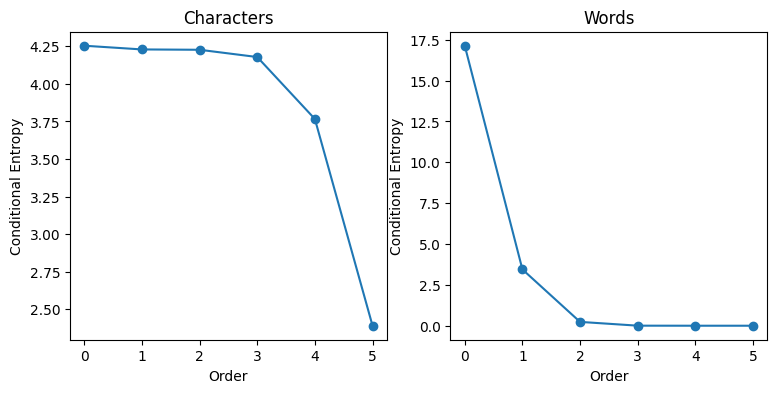

In [41]:
plot(chars, words)

Judgement: **Not** a natural language

Justification:
- the plot for characters is far from being linear, furthermore it looks like knowing up to 3 characters tells us nothing about the next
- for words the entropy drops too much between 0th and 1st orders, and then reaches close to 0 values for order 4 and higher, that indicates that patterns in this text are less complex than in natural languages

### Sample 6

In [42]:
text_path = "lab3/sample5.txt"

In [43]:
chars, words = get_cond_entr(text_path)

Conditional entropy:
Order: 0 | Characters: 4.4417 | Words: 16.5095
Order: 1 | Characters: 3.5231 | Words: 0.0000
Order: 2 | Characters: 3.2506 | Words: 0.0000
Order: 3 | Characters: 2.8343 | Words: 0.0000
Order: 4 | Characters: 2.1724 | Words: 0.0000
Order: 5 | Characters: 1.4469 | Words: 0.0000


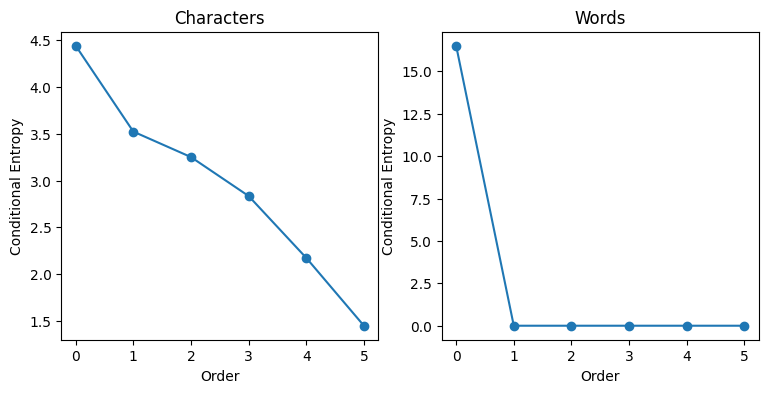

In [44]:
plot(chars, words)

Judgement: **Not** a natural language

Justification:
- the plot for characters looks a little odd because of significant drop between orders 0 and 1, and then some flattening between 1 and 2. Let's say though that it fits into my tolerance range

However for words it looks nothing like natural language, it is basically the same problem as in previous sample, but even worse. The entropy drops way too much between 0th and 1st orders, and then reaches close to 0 values for order 1 and higher, that indicates that patterns in this text are much less complex than in natural languages and we basically know what is coming next after a single word

Looking at this graphs I would say that words in this text follow some pattern, however their ordering is completely random